# Principal Component Analysis (PCA) and Sparse PCA

## Alternative Optimization

### Traditional PCA
Traditional PCA finds the first principal component vector by solving the following optimization problem:

$$ 
\mathbf{u}_1 = \arg\min_{\|\mathbf{u}\|=1} \left( \frac{1}{N} \sum_{n=1}^{N} \|\mathbf{t}_n - \mathbf{u}\mathbf{u}^T\mathbf{t}_n\|^2 \right)
$$

Here:
- $\mathbf{t}_n$ represents the transformed feature vector for the $n$-th data point.
- $\mathbf{u}$ is a unit vector in $\mathbb{R}^M$.

### Rewritten Problem with Constraint
The above problem can be rewritten in the following equivalent form by introducing an additional variable $\mathbf{z}$:

$$
(\mathbf{u}_1, \mathbf{z}_1) = \arg\min_{\|\mathbf{u}\|=1, \mathbf{z}} \left( \frac{1}{N-1} \sum_{n=0}^{N-1} \|\mathbf{t}_n - \mathbf{u}\mathbf{z}^T\mathbf{t}_n\|^2 \right), \text{ subject to } \mathbf{u} = \mathbf{z} 
$$

### Optimization without Constraint
Ignoring the equality constraint, the optimization problem becomes:

$$
(\mathbf{u}_x, \mathbf{z}_x) = \arg\min_{\|\mathbf{u}\|=1, \mathbf{z}} \left( \frac{1}{N-1} \sum_{n=0}^{N-1} \|\mathbf{t}_n - \mathbf{u}\mathbf{z}^T\mathbf{t}_n\|^2 \right)
$$

The solution to this problem leads to $\mathbf{u}_x = \mathbf{u}_1$ and $\mathbf{z}_x = \mathbf{u}_1$, where $\mathbf{u}_1$ is the first column of the matrix $\mathbf{U}$.

## Sparse PCA

### Sparse PCA with Elastic-Net Regularization
Sparse PCA extends traditional PCA by incorporating sparsity into the principal components. The optimization problem with elastic-net regularization is formulated as:

$$
(\mathbf{U}_1, \mathbf{Z}_1) = \arg\min_{\mathbf{A}^T\mathbf{A} = \mathbf{I}_{M'}} \left( \sum_{n=0}^{N-1} \|\mathbf{t}_n - \mathbf{A}\mathbf{Z}\mathbf{t}_n\|^2 + \alpha \sum_{m=1}^{M'} \|\mathbf{z}_m\|_1 + \rho \sum_{m=1}^{M'} \|\mathbf{z}_m\|_2 \right)
$$

Here:
- $\mathbf{A}$ is an $M \times M'$ matrix.
- $\mathbf{Z}$ is an $M' \times M'$ matrix.
- $\alpha$ and $\rho$ are regularization parameters.

### Objective Function for Sparse PCA
The objective function can be expressed as:

$$
P(\mathbf{A}, \mathbf{Z}) = \sum_{n=0}^{N-1} \|\mathbf{t}_n - \mathbf{A}\mathbf{Z}\mathbf{t}_n\|^2 + \alpha \sum_{m=1}^{M'} \|\mathbf{z}_m\|_1 + \rho \sum_{m=1}^{M'} \|\mathbf{z}_m\|_2
$$

In matrix notation, this is:

$$
P(\mathbf{A}, \mathbf{Z}) = \|\mathbf{T} - \mathbf{T}\mathbf{Z}\mathbf{A}^T\|_F^2 + \alpha \sum_{m=1}^{M'} \|\mathbf{z}_m\|_1 + \rho \sum_{m=1}^{M'} \|\mathbf{z}_m\|_2
$$

where $\mathbf{T}$ is the matrix of transformed feature vectors.

### Sparse PCA Algorithm

#### Initialization
Given $N$ feature vectors $\{\mathbf{x}_n \in \mathbb{R}^M\}$:
1. Transform them to $\{\mathbf{t}_{n,p} \in \mathbb{R}^M\}$.
2. Collect the $\{\mathbf{t}_{n,p}\}$ into the $N \times M$ matrix $\mathbf{T}_p$.

Objective: Determine an $M \times M'$ principal component matrix $\mathbf{U}_1$ to reduce $\{\mathbf{t}_{n,p}\}$ into $\{\mathbf{t}'_n = \mathbf{U}_1^T \mathbf{t}_{n,p} \in \mathbb{R}^{M'}\}$.

#### Iterative Optimization
Start from arbitrary $M \times M'$ initial conditions $\mathbf{A}_{-1}$ and $\mathbf{Z}_{-1}$. Denote the columns of $\{\mathbf{A}, \mathbf{Z}\}$ by $\{\mathbf{a}_m, \mathbf{z}_m\}$, for $m = 1, \ldots, M'$.

Repeat until convergence over $k = 0, 1, 2, \ldots$:

1. **Minimizing over $\mathbf{Z}$**:
   - Assume that at iteration $k-1$ the value of $\mathbf{A}$ is fixed at $\mathbf{A}_{k-1}$.
   - Solve the LASSO problem for each column $\mathbf{z}_m$:

$$
\hat{\mathbf{z}}_m = \arg\min_{\mathbf{z} \in \mathbb{R}^M} \left( \alpha \|\mathbf{z}\|_1 + \rho \|\mathbf{z}\|_2 + \|\mathbf{y}_m - \mathbf{T}_p \mathbf{z}\|^2 \right), \quad m = 1, 2, \ldots, M'
$$

   - Iterative Soft-Thresholding Algorithm (ISTA):

$$
\begin{align*}
\mathbf{y}_i &= (1 - 2\mu\rho)\mathbf{r}_{i-1} + 2\mu\mathbf{T}_p^T(\mathbf{y}_m - \mathbf{T}_p\mathbf{r}_{i-1}), \quad i \geq 0 \\
\mathbf{r}_i &= \mathcal{T}_{\mu\alpha}(\mathbf{y}_i)
\end{align*}
$$

   - Apply this construction until convergence to obtain $\hat{\mathbf{z}}_m$.

2. **Minimizing over $\mathbf{A}$**:
   - Assume $\mathbf{Z}$ is fixed at $\mathbf{Z}_k$.
   - Update $\mathbf{A}$ from $\mathbf{A}_{k-1}$ to $\mathbf{A}_k$:

$$
\mathbf{A}_k = \arg\max_{\mathbf{A}^T\mathbf{A} = \mathbf{I}_{M'}} \text{Tr}(\mathbf{A}\mathbf{Z}_k^T\mathbf{T}_p^T\mathbf{T}_p)
$$

   - Introduce the SVD:

$$
\mathbf{Z}_k^T\mathbf{T}_p^T\mathbf{T}_p = \mathbf{U}_a \begin{bmatrix} \mathbf{\Sigma}_a & \mathbf{0} \end{bmatrix} \mathbf{V}_a^T
$$

   - Then, 

$$
\mathbf{A}_k = \mathbf{V}_a \mathbf{U}_a^T
$$

#### Final Steps
- Set $\mathbf{U}_1 = \mathbf{Z}_k$ after convergence.
- Normalize each column of $\mathbf{U}_1$ to unit norm.
- Encode the reduced features:

$$
\mathbf{t}'_n = \mathbf{U}_1^T \mathbf{t}_{n,p}, \quad \forall n
$$

- Decode the features:

$$
\hat{\mathbf{t}}_n = \bar{\mathbf{t}} + \mathbf{S}\mathbf{U}_1\mathbf{t}'_n, \quad \forall n
$$

where $\bar{\mathbf{t}}$ is the ensemble average and $\mathbf{S}$ is a diagonal matrix of standard deviations.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_target = wine.target
wine_data['Target'] = wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

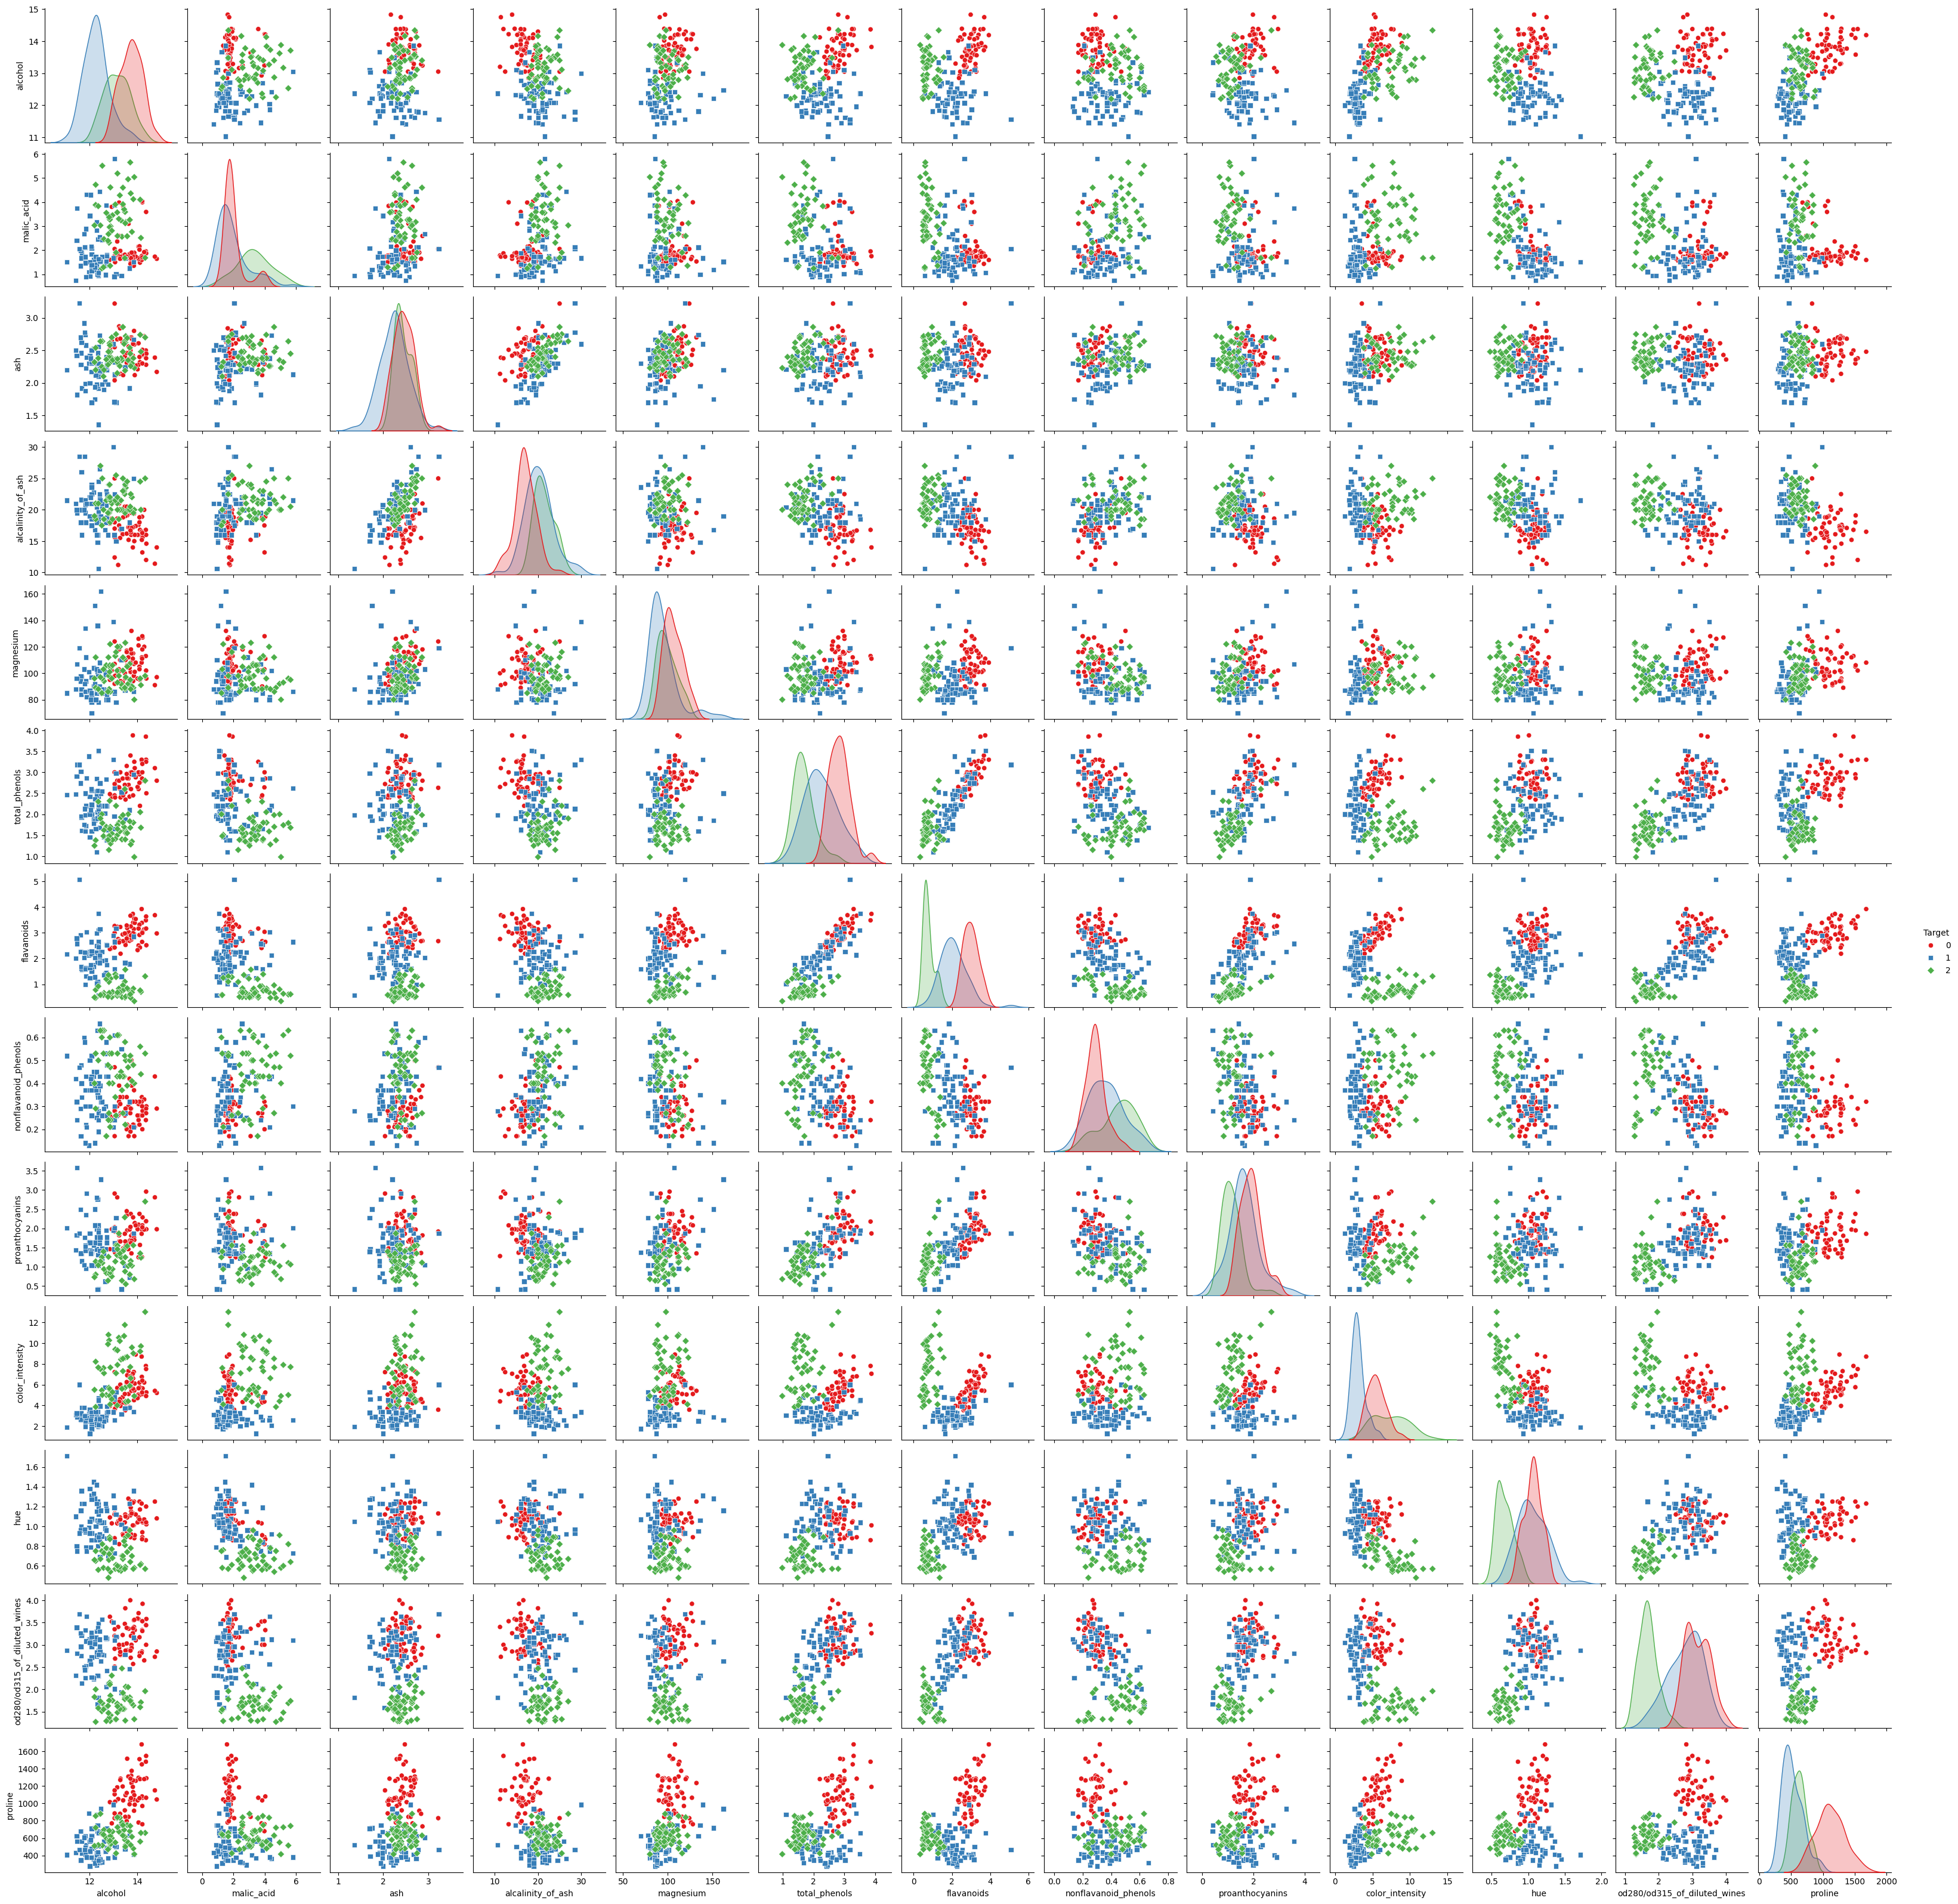

In [4]:
pairplot = sns.pairplot(wine_data, hue='Target', palette='Set1', diag_kind='kde', markers=["o", "s", "D"])


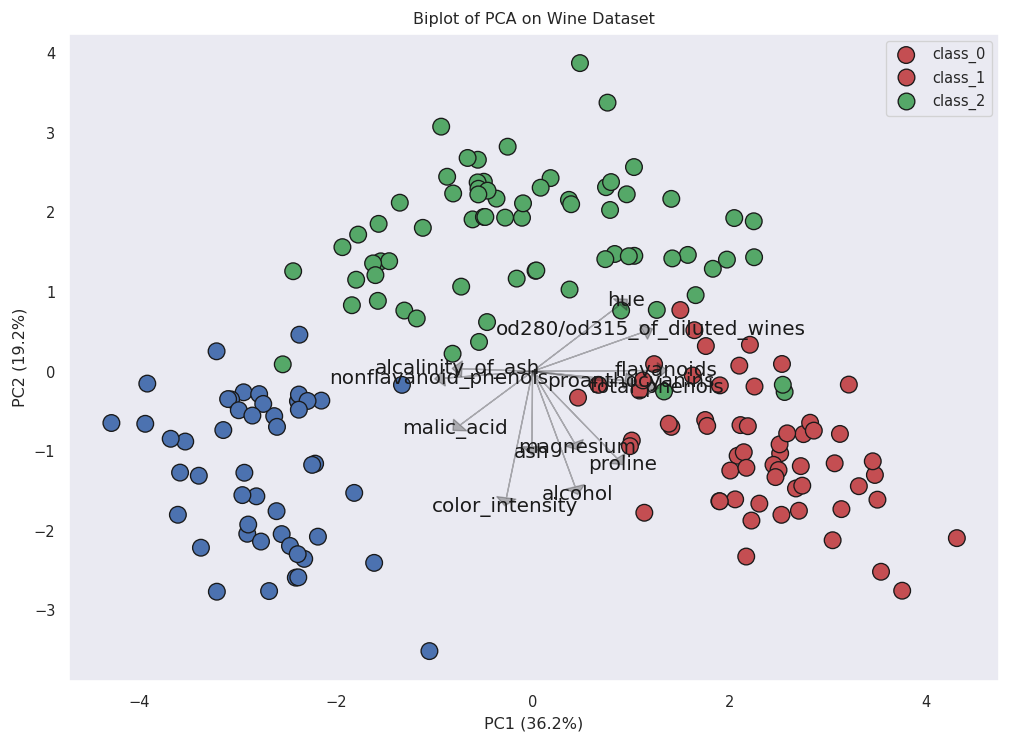

In [11]:
# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data.loc[:, wine_data.columns != 'Target'])

# Perform PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(wine_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Target'] = wine_target

# Biplot function using Seaborn
def biplot(data, pc, features, target_names):
    #sns.set(style="whitegrid")
    sns.set_theme()
    sns.set_context("paper")

    plt.figure(figsize=(10, 7), dpi=120)

    # Scatter plot
    sns.scatterplot(data=data, x='PC1', y='PC2', hue='Target', palette=['r', 'g', 'b'], s=100, edgecolor='k')
    
    # Arrows for features
    for i, feature in enumerate(features):
        plt.arrow(0, 0, pc[i, 0] * 3, pc[i, 1] * 3, color='k', alpha=0.3, head_width=0.2, head_length=0.1)
        plt.text(pc[i, 0] * 3.2, pc[i, 1] * 3.2, feature, color='k', ha='center', va='center', fontsize=12)
    
    # Labels and title
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)')
    plt.title('Biplot of PCA on Wine Dataset')
    plt.legend(target_names)
    plt.grid()

# Call the biplot function
biplot(pca_df, pca.components_.T, wine.feature_names, wine.target_names)
plt.show()

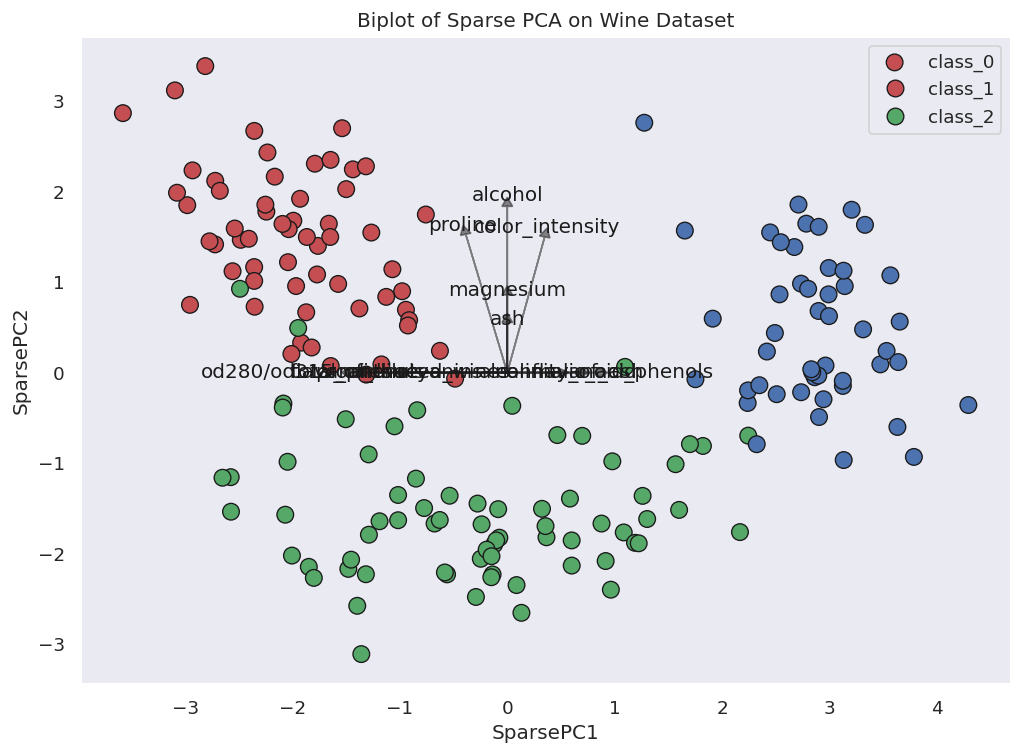

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_target = wine.target

# Create a pipeline with StandardScaler and SparsePCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sparse_pca', SparsePCA(n_components=2, alpha=3.0, random_state=42))
])

# Fit the pipeline to the data
sparse_pca_result = pipeline.fit_transform(wine_data)

# Create a DataFrame with the sparse principal components
sparse_pca_df = pd.DataFrame(data=sparse_pca_result, columns=['SparsePC1', 'SparsePC2'])
sparse_pca_df['Target'] = wine_target

# Biplot function using Seaborn
def biplot(data, components, features, target_names):
    sns.set_theme()
    plt.figure(figsize=(10, 7), dpi=120)

    # Scatter plot
    sns.scatterplot(data=data, x='SparsePC1', y='SparsePC2', hue='Target', palette=['r', 'g', 'b'], s=100, edgecolor='k')
    
    # Arrows for features
    for i, feature in enumerate(features):
        plt.arrow(0, 0, components[i, 0] * 3, components[i, 1] * 3, color='k', alpha=0.5, head_width=0.1, head_length=0.1)
        plt.text(components[i, 0] * 3.2, components[i, 1] * 3.2, feature, color='k', ha='center', va='center', fontsize=12)
    
    # Labels and title
    plt.xlabel('SparsePC1')
    plt.ylabel('SparsePC2')
    plt.title('Biplot of Sparse PCA on Wine Dataset')
    plt.legend(target_names)
    plt.grid()

# Call the biplot function
biplot(sparse_pca_df, pipeline.named_steps['sparse_pca'].components_.T, wine.feature_names, wine.target_names)
plt.show()
